In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

np.set_printoptions(precision=3, suppress=True)

def print_section(title):
    print("\n" + "="*80)
    print(title)
    print("="*80)


In [11]:
print_section("1. Scalars, Vectors, Matrices, Tensors")

# Scalar: tensor bậc 0
scalar = 3.14
print("Scalar:", scalar, "| type:", type(scalar))

# Vector: tensor bậc 1
vec = np.array([1.0, 2.0, 3.0])
print("\nVector v:", vec)
print("Shape:", vec.shape, "| Rank (ndim):", vec.ndim)

# Matrix: tensor bậc 2
mat = np.array([[1.0, 2.0, 3.0],
                [4.0, 5.0, 6.0]])
print("\nMatrix A:\n", mat)
print("Shape:", mat.shape, "| Rank (ndim):", mat.ndim)

# Tensor bậc cao hơn (ví dụ: batch x height x width x channels)
tensor4d = np.random.randn(2, 3, 4, 3)   # (batch, H, W, C)
print("\nTensor 4D X (batch, H, W, C) shape:", tensor4d.shape)
print("Rank (ndim):", tensor4d.ndim)

# Minh hoạ len(X) là kích thước trục 0
print("\nlen(tensor4d):", len(tensor4d), " (kích thước axis 0 / batch size)")



1. Scalars, Vectors, Matrices, Tensors
Scalar: 3.14 | type: <class 'float'>

Vector v: [1. 2. 3.]
Shape: (3,) | Rank (ndim): 1

Matrix A:
 [[1. 2. 3.]
 [4. 5. 6.]]
Shape: (2, 3) | Rank (ndim): 2

Tensor 4D X (batch, H, W, C) shape: (2, 3, 4, 3)
Rank (ndim): 4

len(tensor4d): 2  (kích thước axis 0 / batch size)


In [12]:
print_section("2. Tensor arithmetic & broadcasting")

# Ví dụ 1: cộng vector với từng hàng của ma trận (broadcast theo axis 0)
x = np.array([[1, 2, 3],
              [4, 5, 6]])      # shape (2, 3)
y = np.array([10, 20, 30])     # shape (3,)

print("x (shape {}):\n{}".format(x.shape, x))
print("\ny (shape {}):\n{}".format(y.shape, y))

# y sẽ được broadcast thành shape (2, 3) để cộng với x
z = x + y
print("\n=== x + y (broadcast theo trục 0) ===")
print("z = x + y (shape {}):\n{}".format(z.shape, z))

# Nhân element-wise với scalar
w = x * 2
print("\n=== x * 2 (nhân scalar từng phần tử) ===")
print("w = x * 2 (shape {}):\n{}".format(w.shape, w))


# Ví dụ 2: broadcasting theo trục cột (axis 1)
a = np.arange(6).reshape(2, 3)   # shape (2, 3)
b = np.array([[10],
              [20]])             # shape (2, 1)

print("\n--- Ví dụ broadcasting 2 ---")
print("a (shape {}):\n{}".format(a.shape, a))
print("\nb (shape {}):\n{}".format(b.shape, b))

# b sẽ được broadcast thành shape (2, 3) để cộng với a
c = a + b
print("\n=== a + b (broadcast theo trục cột) ===")
print("c = a + b (shape {}):\n{}".format(c.shape, c))

# Ví dụ 3: broadcasting với tensor 3D và vector 1D
T = np.ones((2, 3, 4))           # shape (2,3,4)
v = np.array([1, 2, 3, 4])       # shape (4,)

print("\n--- Ví dụ broadcasting 3D + 1D ---")
print("T shape:", T.shape)
print("v shape:", v.shape)

# v sẽ broadcast lên (1,1,4) rồi (2,3,4)
T2 = T * v
print("\n=== T * v (broadcast trên trục cuối) ===")
print("T2 shape:", T2.shape)
print("T2[0,0,:] = ", T2[0,0,:])



2. Tensor arithmetic & broadcasting
x (shape (2, 3)):
[[1 2 3]
 [4 5 6]]

y (shape (3,)):
[10 20 30]

=== x + y (broadcast theo trục 0) ===
z = x + y (shape (2, 3)):
[[11 22 33]
 [14 25 36]]

=== x * 2 (nhân scalar từng phần tử) ===
w = x * 2 (shape (2, 3)):
[[ 2  4  6]
 [ 8 10 12]]

--- Ví dụ broadcasting 2 ---
a (shape (2, 3)):
[[0 1 2]
 [3 4 5]]

b (shape (2, 1)):
[[10]
 [20]]

=== a + b (broadcast theo trục cột) ===
c = a + b (shape (2, 3)):
[[10 11 12]
 [23 24 25]]

--- Ví dụ broadcasting 3D + 1D ---
T shape: (2, 3, 4)
v shape: (4,)

=== T * v (broadcast trên trục cuối) ===
T2 shape: (2, 3, 4)
T2[0,0,:] =  [1. 2. 3. 4.]


In [13]:
print_section("3. Reduction & Non-reduction sum")

X = np.arange(2*3*4).reshape(2, 3, 4)
print("Tensor X shape:", X.shape)
print("X:\n", X)

# Tổng toàn bộ phần tử
print("\nnp.sum(X):", np.sum(X))

# Sum theo từng axis
print("\nSum theo axis=0 -> shape (3, 4):")
print(np.sum(X, axis=0))

print("\nSum theo axis=1 -> shape (2, 4):")
print(np.sum(X, axis=1))

print("\nSum theo axis=2 -> shape (2, 3):")
print(np.sum(X, axis=2))

# Non-reduction sum: cộng 2 tensor cùng shape, shape giữ nguyên
A = np.ones((2, 3))
B = 2 * np.ones((2, 3))
C = A + B
print("\nNon-reduction sum: A+B, shape:", C.shape)
print(C)



3. Reduction & Non-reduction sum
Tensor X shape: (2, 3, 4)
X:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

np.sum(X): 276

Sum theo axis=0 -> shape (3, 4):
[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]

Sum theo axis=1 -> shape (2, 4):
[[12 15 18 21]
 [48 51 54 57]]

Sum theo axis=2 -> shape (2, 3):
[[ 6 22 38]
 [54 70 86]]

Non-reduction sum: A+B, shape: (2, 3)
[[3. 3. 3.]
 [3. 3. 3.]]


In [14]:
print_section("4. Dot product & góc giữa vector")

u = np.array([1.0, 2.0, 3.0])
v = np.array([4.0, 5.0, 6.0])

dot_uv = np.dot(u, v)
print("u:", u)
print("v:", v)
print("Dot product u·v =", dot_uv)

# Tính cos(theta) = (u·v) / (||u|| ||v||)
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)
cos_theta = dot_uv / (norm_u * norm_v)
print("\n||u||_2 =", norm_u)
print("||v||_2 =", norm_v)
print("cos(theta) =", cos_theta)



4. Dot product & góc giữa vector
u: [1. 2. 3.]
v: [4. 5. 6.]
Dot product u·v = 32.0

||u||_2 = 3.7416573867739413
||v||_2 = 8.774964387392123
cos(theta) = 0.9746318461970762


In [15]:
print_section("5. Matrix–vector product & rotation")

# Ma trận 2x2
A = np.array([[1.0, 2.0],
              [3.0, 4.0]])
x = np.array([0.5, -1.0])

y = A @ x   # tương đương np.dot(A, x)
print("A:\n", A)
print("x:", x)
print("y = A @ x:", y)

# Ma trận quay 2D
theta = np.pi / 4   # 45 độ
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
p = np.array([1.0, 0.0])  # điểm nằm trên trục x
p_rot = R @ p

print("\nMa trận quay R(45°):\n", R)
print("p:", p)
print("p' = R @ p:", p_rot)



5. Matrix–vector product & rotation
A:
 [[1. 2.]
 [3. 4.]]
x: [ 0.5 -1. ]
y = A @ x: [-1.5 -2.5]

Ma trận quay R(45°):
 [[ 0.707 -0.707]
 [ 0.707  0.707]]
p: [1. 0.]
p' = R @ p: [0.707 0.707]


In [16]:
print_section("6. Matrix–matrix product & associativity (demo nhỏ)")

# Dùng kích thước nhỏ để có thể chạy được
m, n, p, q = 4, 5, 3, 2
A = np.random.randn(m, n)
B = np.random.randn(n, p)
C = np.random.randn(p, q)

print("Shapes: A", A.shape, "B", B.shape, "C", C.shape)

# (AB)C
AB = A @ B
ABC_1 = AB @ C

# A(BC)
BC = B @ C
ABC_2 = A @ BC

print("\n(AB)C shape:", ABC_1.shape)
print("A(BC) shape:", ABC_2.shape)
print("2 kết quả có gần như bằng nhau? ->", np.allclose(ABC_1, ABC_2))

# Minh hoạ chi phí (số phép toán lý thuyết) với kích thước tổng quát
def mult_cost(m, n, p):
    return m * n * p

print("\nChi phí lý thuyết m*n*p với kích thước tổng quát:")
print("cost((AB)C) ~ (m*n*p) + (m*p*q)")
print("cost(A(BC)) ~ (n*p*q) + (m*n*q)")



6. Matrix–matrix product & associativity (demo nhỏ)
Shapes: A (4, 5) B (5, 3) C (3, 2)

(AB)C shape: (4, 2)
A(BC) shape: (4, 2)
2 kết quả có gần như bằng nhau? -> True

Chi phí lý thuyết m*n*p với kích thước tổng quát:
cost((AB)C) ~ (m*n*p) + (m*p*q)
cost(A(BC)) ~ (n*p*q) + (m*n*q)


In [17]:
print_section("7. Norms: l1, l2, linf, Frobenius")

x = np.array([1.0, -2.0, 3.0])
A = np.array([[1.0, -2.0],
              [3.0,  4.0]])

# Vector norms
l1 = np.linalg.norm(x, ord=1)
l2 = np.linalg.norm(x, ord=2)
linf = np.linalg.norm(x, ord=np.inf)

print("Vector x:", x)
print("||x||_1 =", l1)
print("||x||_2 =", l2)
print("||x||_∞ =", linf)

# Frobenius norm cho ma trận
fro = np.linalg.norm(A, ord="fro")
print("\nMatrix A:\n", A)
print("||A||_F (Frobenius) =", fro)



7. Norms: l1, l2, linf, Frobenius
Vector x: [ 1. -2.  3.]
||x||_1 = 6.0
||x||_2 = 3.7416573867739413
||x||_∞ = 3.0

Matrix A:
 [[ 1. -2.]
 [ 3.  4.]]
||A||_F (Frobenius) = 5.477225575051661


In [18]:
print_section("8. Stack 3 matrices thành tensor và slice lại B")

A = np.ones((3, 4))          # 3x4
B = 2 * np.ones((3, 4))
C = 3 * np.ones((3, 4))

# Stack theo trục thứ ba (axis=2) -> shape (3, 4, 3)
T = np.stack([A, B, C], axis=2)
print("Shape của A,B,C:", A.shape)
print("Tensor T shape:", T.shape)

# Kiểm tra indexing: T[:,:,0] = A, T[:,:,1] = B, T[:,:,2] = C
print("\nT[:,:,0] (nên là A):\n", T[:, :, 0])
print("\nT[:,:,1] (nên là B):\n", T[:, :, 1])
print("\nT[:,:,2] (nên là C):\n", T[:, :, 2])

print("\nSlice ra B từ T: B_recovered = T[:,:,1]")
B_recovered = T[:, :, 1]
print("B_recovered shape:", B_recovered.shape)
print("B_recovered:\n", B_recovered)
print("B_recovered có bằng B gốc không? ->", np.allclose(B_recovered, B))



8. Stack 3 matrices thành tensor và slice lại B
Shape của A,B,C: (3, 4)
Tensor T shape: (3, 4, 3)

T[:,:,0] (nên là A):
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

T[:,:,1] (nên là B):
 [[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]

T[:,:,2] (nên là C):
 [[3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]

Slice ra B từ T: B_recovered = T[:,:,1]
B_recovered shape: (3, 4)
B_recovered:
 [[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
B_recovered có bằng B gốc không? -> True



Geometry of Vectors (Hình học của vector)
v = [2. 1.]
w = [-1.  3.]

v + w = [1. 4.]
v - w = [ 3. -2.]
2.5 * v = [5.  2.5]

||v||_1 = 3.0
||v||_2 = 2.23606797749979
||v||_inf = 2.0
Khoảng cách Euclid d(v,w) = 3.605551275463989

Chiếu v lên hướng của w = [-0.1  0.3]


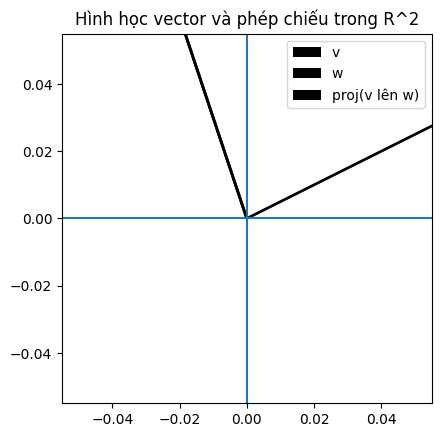


Giải thích:
Cell này minh hoạ cộng/trừ vector, nhân vô hướng, các loại norm và khoảng cách Euclid.
Phép chiếu thể hiện thành phần của v theo hướng của w (chiếu vuông góc xuống đường thẳng span(w)).


In [3]:
print_section("Geometry of Vectors (Hình học của vector)")

# Ví dụ vector trong R^2
v = np.array([2.0, 1.0])
w = np.array([-1.0, 3.0])

# Các phép toán cơ bản
v_plus_w = v + w
v_minus_w = v - w
alpha = 2.5
alpha_v = alpha * v

# Norm và khoảng cách
l1 = np.linalg.norm(v, ord=1)
l2 = np.linalg.norm(v, ord=2)
linf = np.linalg.norm(v, ord=np.inf)
dist_vw = np.linalg.norm(v - w, ord=2)

# Vector đơn vị và phép chiếu v lên hướng của w
w_unit = w / np.linalg.norm(w)
proj_v_on_w = (v @ w_unit) * w_unit

print("v =", v)
print("w =", w)
print("\nv + w =", v_plus_w)
print("v - w =", v_minus_w)
print(f"{alpha} * v =", alpha_v)

print("\n||v||_1 =", l1)
print("||v||_2 =", l2)
print("||v||_inf =", linf)
print("Khoảng cách Euclid d(v,w) =", dist_vw)
print("\nChiếu v lên hướng của w =", proj_v_on_w)

# Minh hoạ hình học trong 2D
plt.figure()
origin = np.zeros(2)
plt.quiver(*origin, *v, angles="xy", scale_units="xy", scale=1, label="v")
plt.quiver(*origin, *w, angles="xy", scale_units="xy", scale=1, label="w")
plt.quiver(*origin, *proj_v_on_w, angles="xy", scale_units="xy", scale=1, label="proj(v lên w)")
plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect("equal", adjustable="box")
plt.legend()
plt.title("Hình học vector và phép chiếu trong R^2")
plt.show()

print("\nGiải thích:")
print("Cell này minh hoạ cộng/trừ vector, nhân vô hướng, các loại norm và khoảng cách Euclid.")
print("Phép chiếu thể hiện thành phần của v theo hướng của w (chiếu vuông góc xuống đường thẳng span(w)).")


In [4]:
print_section("Dot Products and Angles (Tích vô hướng và góc)")

v1 = np.array([1.0, 0.0, -1.0, 2.0])
v2 = np.array([3.0, 1.0,  0.0, 1.0])

dot = float(v1 @ v2)
n1 = float(np.linalg.norm(v1))
n2 = float(np.linalg.norm(v2))

cos_theta = dot / (n1 * n2)
cos_theta = float(np.clip(cos_theta, -1.0, 1.0))
theta_rad = float(np.arccos(cos_theta))
theta_deg = float(np.degrees(theta_rad))

print("v1 =", v1)
print("v2 =", v2)
print("\nv1 · v2 =", dot)
print("||v1||_2 =", n1)
print("||v2||_2 =", n2)
print("cos(theta) =", cos_theta)
print("theta (radian) =", theta_rad)
print("theta (độ) =", theta_deg)

print("\nGiải thích:")
print("Góc giữa hai vector được xác định bởi cos(theta) = (v1·v2) / (||v1|| ||v2||).")
print("Nếu tích vô hướng dương thì góc nhọn, bằng 0 thì vuông góc, âm thì góc tù.")
print("Clip cos(theta) chỉ để tránh lỗi số học nhỏ khiến giá trị vượt nhẹ khỏi [-1,1].")



Dot Products and Angles (Tích vô hướng và góc)
v1 = [ 1.  0. -1.  2.]
v2 = [3. 1. 0. 1.]

v1 · v2 = 5.0
||v1||_2 = 2.449489742783178
||v2||_2 = 3.3166247903554
cos(theta) = 0.6154574548966638
theta (radian) = 0.9078300905002588
theta (độ) = 52.0148327006444

Giải thích:
Góc giữa hai vector được xác định bởi cos(theta) = (v1·v2) / (||v1|| ||v2||).
Nếu tích vô hướng dương thì góc nhọn, bằng 0 thì vuông góc, âm thì góc tù.
Clip cos(theta) chỉ để tránh lỗi số học nhỏ khiến giá trị vượt nhẹ khỏi [-1,1].


In [5]:
print_section("Cosine Similarity (Độ tương tự cosine)")

def cosine_similarity(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    return float((a @ b) / (np.linalg.norm(a) * np.linalg.norm(b)))

x = np.array([1.0, 2.0, 3.0])
y = np.array([2.0, 4.0, 6.0])      # cùng hướng với x (tỷ lệ)
z = np.array([3.0, 0.0, -1.0])     # hướng khác

sim_xy = cosine_similarity(x, y)
sim_xz = cosine_similarity(x, z)
sim_yz = cosine_similarity(y, z)

print("x =", x)
print("y =", y)
print("z =", z)
print("\ncos_sim(x,y) =", sim_xy)
print("cos_sim(x,z) =", sim_xz)
print("cos_sim(y,z) =", sim_yz)

# Kiểm chứng: cosine similarity = tích vô hướng của vector đã chuẩn hoá
x_hat = x / np.linalg.norm(x)
y_hat = y / np.linalg.norm(y)
z_hat = z / np.linalg.norm(z)

print("\nx_hat · y_hat =", float(x_hat @ y_hat))
print("x_hat · z_hat =", float(x_hat @ z_hat))

print("\nGiải thích:")
print("Cosine similarity đo độ giống nhau về hướng (không quan tâm độ lớn).")
print("x và y cùng phương nên cos_sim(x,y) xấp xỉ 1.")
print("Công thức tương đương: cos_sim(x,y) = x_hat · y_hat, với x_hat, y_hat là vector chuẩn hoá.")



Cosine Similarity (Độ tương tự cosine)
x = [1. 2. 3.]
y = [2. 4. 6.]
z = [ 3.  0. -1.]

cos_sim(x,y) = 1.0
cos_sim(x,z) = 0.0
cos_sim(y,z) = 0.0

x_hat · y_hat = 1.0
x_hat · z_hat = 0.0

Giải thích:
Cosine similarity đo độ giống nhau về hướng (không quan tâm độ lớn).
x và y cùng phương nên cos_sim(x,y) xấp xỉ 1.
Công thức tương đương: cos_sim(x,y) = x_hat · y_hat, với x_hat, y_hat là vector chuẩn hoá.



Hyperplanes (Siêu phẳng)
w = [ 1.  -0.6]
b = -0.2

5 khoảng cách có dấu đầu tiên = [ 0.004  0.324 -0.817  0.459 -0.124]
5 nhãn đầu tiên = [1 1 0 1 0]


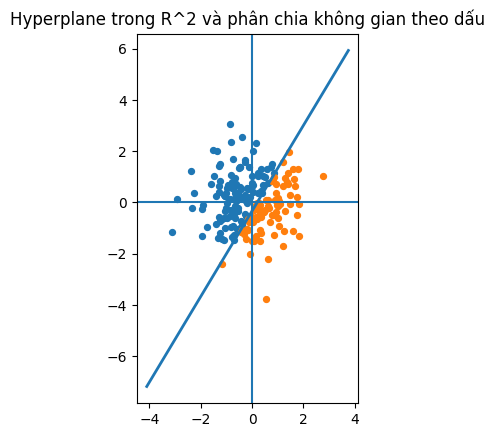


Giải thích:
Siêu phẳng có dạng w^T x + b = 0, chia không gian thành hai nửa: w^T x + b > 0 và < 0.
Giá trị (w^T x + b)/||w|| là khoảng cách có dấu từ điểm x đến siêu phẳng.
Trong machine learning, hyperplane thường đóng vai trò ranh giới phân lớp tuyến tính.


In [ ]:
print_section("Hyperplanes (Siêu phẳng)")

# Trong R^2, hyperplane là đường thẳng: w^T x + b = 0
w = np.array([1.0, -0.6])
b = -0.2

# Sinh điểm ngẫu nhiên và phân loại theo dấu của w^T x + b
rng = np.random.default_rng(0)
X = rng.normal(size=(200, 2))

signed = (X @ w + b) / np.linalg.norm(w)   # khoảng cách có dấu
labels = (signed >= 0).astype(int)

print("w =", w)
print("b =", b)
print("\n5 khoảng cách có dấu đầu tiên =", signed[:5])
print("5 nhãn đầu tiên =", labels[:5])

# Vẽ hyperplane và các điểm
plt.figure()
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=18, label="w^T x + b < 0")
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=18, label="w^T x + b ≥ 0")

xs = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
ys = -(w[0] * xs + b) / w[1]
plt.plot(xs, ys, linewidth=2, label="hyperplane: w^T x + b = 0")

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect("equal", adjustable="box")
plt.legend()
plt.title("Hyperplane trong R^2 và phân chia không gian theo dấu")
plt.show()

print("\nGiải thích:")
print("Siêu phẳng có dạng w^T x + b = 0, chia không gian thành hai nửa: w^T x + b > 0 và < 0.")
print("Giá trị (w^T x + b)/||w|| là khoảng cách có dấu từ điểm x đến siêu phẳng.")
print("Trong machine learning, hyperplane thường đóng vai trò ranh giới phân lớp tuyến tính.")



Geometry of Linear Transformations (Hình học của biến đổi tuyến tính)
A =
 [[1.2 0.7]
 [0.3 1.1]]

det(A) = 1.11


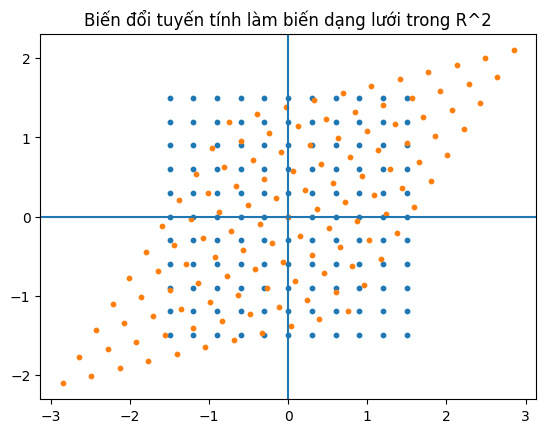


Giải thích:
Biến đổi tuyến tính ánh xạ mỗi điểm x thành Ax. Hình dạng của lưới sẽ bị kéo giãn, xoay, shear, ...
Trong 2D, |det(A)| là hệ số tỉ lệ diện tích: area' = |det(A)| * area.


In [ ]:
print_section("Geometry of Linear Transformations (Hình học của biến đổi tuyến tính)")

A = np.array([[1.2, 0.7],
              [0.3, 1.1]], dtype=float)

detA = float(np.linalg.det(A))

# Tạo lưới điểm trong R^2 và biến đổi qua A
grid_x = np.linspace(-1.5, 1.5, 11)
grid_y = np.linspace(-1.5, 1.5, 11)

points = np.array([[x, y] for x in grid_x for y in grid_y], dtype=float)
points_T = (A @ points.T).T

print("A =\n", A)
print("\ndet(A) =", detA)

plt.figure()
plt.scatter(points[:, 0], points[:, 1], s=10, label="lưới gốc")
plt.scatter(points_T[:, 0], points_T[:, 1], s=10, label="lưới sau biến đổi Ax")
plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect("equal", adjustable="box")
plt.legend()
plt.title("Biến đổi tuyến tính làm biến dạng lưới trong R^2")
plt.show()

print("\nGiải thích:")
print("Biến đổi tuyến tính ánh xạ mỗi điểm x thành Ax. Hình dạng của lưới sẽ bị kéo giãn, xoay, shear, ...")
print("Trong 2D, |det(A)| là hệ số tỉ lệ diện tích: area' = |det(A)| * area.")


In [9]:
print_section("Tensors and Common Linear Algebra Operations (Tensor và phép toán phổ biến)")

# Tạo các tensor và xem shape
a = np.array(3.0)                           # scalar (0D)
v = np.array([1.0, 2.0, 3.0])               # vector (1D)
M = np.array([[1.0, 2.0],
              [3.0, 4.0],
              [5.0, 6.0]])                  # matrix (2D)
T = np.arange(2*3*4).reshape(2, 3, 4)       # tensor 3D

print("a (scalar) shape:", a.shape)
print("v (vector) shape:", v.shape)
print("M (matrix) shape:", M.shape)
print("T (tensor 3D) shape:", T.shape)

# Broadcasting: cộng một vector (3,) vào tensor (2,3,4) theo trục phù hợp
b = np.array([10.0, 20.0, 30.0])            # shape (3,)
B = T + b.reshape(1, 3, 1)                  # broadcast sang (2,3,4)

print("\nBroadcasting:")
print("b shape:", b.shape)
print("B = T + b reshape -> shape:", B.shape)

# Matrix-vector và matrix-matrix
x = np.array([1.0, -1.0])                   # shape (2,)
Mv = M @ x                                   # (3,2) @ (2,) -> (3,)

print("\nMatrix-vector product:")
print("x =", x)
print("M @ x =", Mv)

# Batch matmul: (batch, m, k) @ (batch, k, n) -> (batch, m, n)
A_batch = np.arange(2*3*4).reshape(2, 3, 4)
B_batch = np.arange(2*4*5).reshape(2, 4, 5)
C_batch = A_batch @ B_batch

print("\nBatch matmul:")
print("A_batch shape:", A_batch.shape)
print("B_batch shape:", B_batch.shape)
print("C_batch shape:", C_batch.shape)

# Einsum: Frobenius inner product <P,Q>_F = sum_ij P_ij Q_ij
P = np.array([[1.0, 2.0],
              [3.0, 4.0]])
Q = np.array([[0.5, -1.0],
              [2.0,  1.5]])

fro_inner = float(np.sum(P * Q))
fro_einsum = float(np.einsum("ij,ij->", P, Q))

print("\nFrobenius inner product:")
print("sum(P * Q) =", fro_inner)
print("einsum('ij,ij->', P, Q) =", fro_einsum)

print("\nGiải thích:")
print("Cell này minh hoạ: khái niệm tensor theo shape, broadcasting (tự động mở rộng chiều),")
print("phép nhân ma trận-vector, batch matmul (nhân theo batch), và phép co tensor (contraction) bằng einsum.")
print("Frobenius inner product là ví dụ điển hình của contraction: cộng theo chỉ số i,j.")



Tensors and Common Linear Algebra Operations (Tensor và phép toán phổ biến)
a (scalar) shape: ()
v (vector) shape: (3,)
M (matrix) shape: (3, 2)
T (tensor 3D) shape: (2, 3, 4)

Broadcasting:
b shape: (3,)
B = T + b reshape -> shape: (2, 3, 4)

Matrix-vector product:
x = [ 1. -1.]
M @ x = [-1. -1. -1.]

Batch matmul:
A_batch shape: (2, 3, 4)
B_batch shape: (2, 4, 5)
C_batch shape: (2, 3, 5)

Frobenius inner product:
sum(P * Q) = 10.5
einsum('ij,ij->', P, Q) = 10.5

Giải thích:
Cell này minh hoạ: khái niệm tensor theo shape, broadcasting (tự động mở rộng chiều),
phép nhân ma trận-vector, batch matmul (nhân theo batch), và phép co tensor (contraction) bằng einsum.
Frobenius inner product là ví dụ điển hình của contraction: cộng theo chỉ số i,j.


In [8]:
print_section("Eigendecomposition (Phân tích trị riêng)")

# Ví dụ ma trận đối xứng (dễ phân rã: A = Q Λ Q^T)
A = np.array([[2.0, 1.0],
              [1.0, 2.0]], dtype=float)

w, Q = np.linalg.eigh(A)      # eigenvalues w, eigenvectors columns of Q
Lambda = np.diag(w)

A_recon = Q @ Lambda @ Q.T
recon_error = float(np.linalg.norm(A - A_recon))

print("A =\n", A)
print("\nEigenvalues (w) =", w)
print("Eigenvectors (Q, theo cột) =\n", Q)
print("\nTái tạo Q Λ Q^T =\n", A_recon)
print("Sai số tái tạo ||A - QΛQ^T||_F =", recon_error)

print("\nKiểm tra A q_i = lambda_i q_i:")
for i in range(Q.shape[1]):
    qi = Q[:, i]
    lam = w[i]
    resid = A @ qi - lam * qi
    print(f"i={i}, lambda={lam:.6g}, residual={resid}")

# Ứng dụng: tính A^k bằng trị riêng
k = 5
A_power_direct = np.linalg.matrix_power(A, k)
A_power_via_eig = Q @ np.diag(w**k) @ Q.T
power_error = float(np.linalg.norm(A_power_direct - A_power_via_eig))

print(f"\nA^{k} (tính trực tiếp) =\n", A_power_direct)
print(f"\nA^{k} (qua trị riêng) =\n", A_power_via_eig)
print("Sai số ||A^k_direct - A^k_eig||_F =", power_error)

print("\nGiải thích:")
print("Với ma trận đối xứng, np.linalg.eigh trả về trị riêng thực và các vector riêng trực chuẩn.")
print("Ta có phân rã A = QΛQ^T, nên có thể tái tạo A với sai số rất nhỏ (do số học dấu chấm động).")
print("Ngoài ra, lũy thừa A^k được tính nhanh theo A^k = QΛ^kQ^T (chỉ cần nâng lũy thừa các trị riêng).")



Eigendecomposition (Phân tích trị riêng)
A =
 [[2. 1.]
 [1. 2.]]

Eigenvalues (w) = [1. 3.]
Eigenvectors (Q, theo cột) =
 [[-0.707  0.707]
 [ 0.707  0.707]]

Tái tạo Q Λ Q^T =
 [[2. 1.]
 [1. 2.]]
Sai số tái tạo ||A - QΛQ^T||_F = 6.473657049138938e-16

Kiểm tra A q_i = lambda_i q_i:
i=0, lambda=1, residual=[0. 0.]
i=1, lambda=3, residual=[0. 0.]

A^5 (tính trực tiếp) =
 [[122. 121.]
 [121. 122.]]

A^5 (qua trị riêng) =
 [[122. 121.]
 [121. 122.]]
Sai số ||A^k_direct - A^k_eig||_F = 2.842170943040401e-14

Giải thích:
Với ma trận đối xứng, np.linalg.eigh trả về trị riêng thực và các vector riêng trực chuẩn.
Ta có phân rã A = QΛQ^T, nên có thể tái tạo A với sai số rất nhỏ (do số học dấu chấm động).
Ngoài ra, lũy thừa A^k được tính nhanh theo A^k = QΛ^kQ^T (chỉ cần nâng lũy thừa các trị riêng).
